In [1]:
import os
import matplotlib.pyplot as plt
import re
import numpy as np
from scipy import stats
#import optshrink as opt # package we create
import numpy as np
# import scipy.io as sio
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import seaborn as sns
from shapely.geometry import Point
import geopandas as gp
from geodatasets import get_path
from shapely.geometry import Polygon

In [2]:
output_col_names = ['lon'
,'lat'
,'variable'
,'cohort_number'
,'stand_age'
,'potential_veg'
,'current_veg'
,'community_type'
,'subtype'
,'silt_clay'  ###check this order
,'lc_state'
,'land_area'
,'cohort_area'
,'year'
,'annual_sum'
,'monthly_maximum'
,'monthly_mean'
,'monthly_minimum'
,'Jan'
,'Feb'
,'Mar'
,'Apr'
,'May'
,'Jun'
,'Jul'
,'Aug'
,'Sep'
,'Oct'
,'Nov'
,'Dec'
,'region']




In [3]:
dir_readin = '/group/moniergrp/TEM_Large_Ensemble/run_support_files/cru_regions/region_3/var_out/'
regions = pd.DataFrame({'files':os.listdir(dir_readin)})

In [4]:
read_in = np.array(regions.loc[regions['files'].str.contains('AVAILN'), 'files'])

In [23]:
##subset out coniferous and deciduous AVAILN, plot timeseries

all_areas_old_params = pd.DataFrame()

for region in read_in:
    tt = pd.read_csv('/group/moniergrp/TEM_Large_Ensemble/run_support_files/cru_regions/region_13/var_out_old_params/' + region, names = output_col_names)
    tt = tt.loc[tt['community_type'].isin([10,11,25,8,9])]
    all_areas_old_params = pd.concat([all_areas_old_params, tt])
    
all_areas_old_params.loc[all_areas_old_params['community_type'].isin([10,11,25]), 'PFT_group'] = 'Temperate Deciduous'
all_areas_old_params.loc[all_areas_old_params['community_type'].isin([9,8]), 'PFT_group'] = 'Temperate Coniferous'


In [24]:
all_areas_old_params['monthly_mean'].describe()

count    5.740885e+06
mean     4.708288e+03
std      1.029446e+05
min      0.000000e+00
25%      7.103000e+02
50%      1.077900e+03
75%      2.238850e+03
max      2.657768e+07
Name: monthly_mean, dtype: float64

In [25]:
all_areas['monthly_mean'].describe()

count    3.152797e+06
mean     5.685574e+03
std      2.448013e+04
min      0.000000e+00
25%      6.337100e+02
50%      9.215200e+02
75%      1.565610e+03
max      6.858088e+06
Name: monthly_mean, dtype: float64

In [45]:
print(dir_readin)
read_in = np.array(regions.loc[regions['files'].str.contains('SOILORGC'), 'files'])

/group/moniergrp/TEM_Large_Ensemble/run_support_files/cru_regions/region_13/var_out/


In [46]:
##subset out coniferous and deciduous AVAILN, plot timeseries

all_areas = pd.DataFrame()

for region in read_in:
    tt = pd.read_csv(dir_readin + region, names = output_col_names)
    tt = tt.loc[tt['community_type'].isin([33])]
    all_areas = pd.concat([all_areas, tt])
    

all_areas.loc[all_areas['community_type'].isin([33]), 'PFT_group'] = 'Broadleaf'


In [48]:
all_areas.monthly_mean.describe()

count    13204.000000
mean       159.145517
std        205.349165
min          0.000000
25%         24.000000
50%         94.210000
75%        222.990000
max       3043.980000
Name: monthly_mean, dtype: float64

In [52]:
all_areas.loc[all_areas['year']==1700, 'monthly_mean']

0         16.65
64963     17.18
115147    22.29
Name: monthly_mean, dtype: float64

<Axes: xlabel='year', ylabel='monthly_mean'>

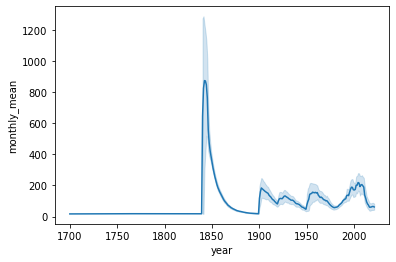

In [50]:
sns.lineplot(data = all_areas.loc[(all_areas['lon']==-119.5)
              &(all_areas['lat']==36.0)],
         x = 'year', y = 'monthly_mean'
        )

In [7]:
##subset out coniferous and deciduous AVAILN, plot timeseries

all_areas = pd.DataFrame()

for region in read_in:
    tt = pd.read_csv(dir_readin + region, names = output_col_names)
    tt = tt.loc[tt['community_type'].isin([10,11,25,8,9,17,20,16,18,33])]
    all_areas = pd.concat([all_areas, tt])
    
all_areas.loc[all_areas['community_type'].isin([10,11,25]), 'PFT_group'] = 'Temperate Deciduous'
all_areas.loc[all_areas['community_type'].isin([9,8]), 'PFT_group'] = 'Temperate Coniferous'
all_areas.loc[all_areas['community_type'].isin([17,20,16,18]), 'PFT_group'] = 'Tropical'
all_areas.loc[all_areas['community_type'].isin([33]), 'PFT_group'] = 'Broadleaf'


In [12]:
all_areas.loc[(all_areas['monthly_mean'] > 10000)&(all_areas['year']==1700)]

,lon,lat,variable,cohort_number,stand_age,potential_veg,current_veg,community_type,subtype,silt_clay,...,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,region,PFT_group
1455224,-104.5,23.5,AVAILN,1,3000,9,9,9,5,50.53,...,11462.86,12723.27,12277.86,10857.31,9441.93,8562.00,8270.35,8457.67,Mexico,Temperate Coniferous
1455225,-104.5,23.5,AVAILN,2,425,9,9,9,5,50.53,...,11462.86,12723.27,12277.86,10857.31,9441.93,8562.00,8270.35,8457.67,Mexico,Temperate Coniferous
4244750,-102.5,18.5,AVAILN,1,3000,9,9,9,5,55.13,...,23360.48,25373.78,25141.57,24072.61,22309.26,20385.23,19057.26,18320.96,Mexico,Temperate Coniferous
4244751,-102.5,18.5,AVAILN,2,425,9,9,9,5,55.13,...,23360.48,25373.78,25141.57,24072.61,22309.26,20385.23,19057.26,18320.96,Mexico,Temperate Coniferous
646649,-90.5,35.5,AVAILN,1,3000,11,11,11,6,58.21,...,9221.70,11513.47,19097.05,19010.23,18329.23,17985.20,17611.72,17189.26,United_States_of_America,Temperate Deciduous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528094,-109.0,30.0,AVAILN,2,425,9,9,9,5,50.84,...,99793.59,99122.91,98443.28,97908.78,98460.33,98931.23,99045.47,98895.68,Mexico,Temperate Coniferous
2549597,-109.0,30.5,AVAILN,1,3000,9,9,9,5,49.85,...,123007.17,122246.62,121475.68,120952.95,121393.36,121672.51,121605.30,121284.42,Mexico,Temperate Coniferous
2596723,-109.0,33.5,AVAILN,1,3000,9,9,9,5,66.63,...,31075.36,30696.91,30379.88,31017.77,31617.93,31850.84,31654.47,31375.92,United_States_of_America,Temperate Coniferous
2784132,-108.5,26.0,AVAILN,1,3000,9,9,9,5,51.10,...,16406.88,18269.48,17711.13,16127.82,14459.74,13329.96,12761.59,12475.99,Mexico,Temperate Coniferous


<Axes: xlabel='year', ylabel='monthly_mean'>

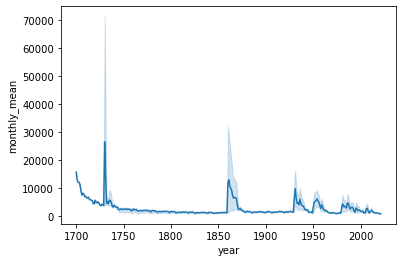

In [14]:
sns.lineplot(data = all_areas.loc[(all_areas['lon']==-90.5)
              &(all_areas['lat']==35.5)],
         x = 'year', y = 'monthly_mean'
        )

In [16]:
all_areas.loc[(all_areas['lon']==-90.5)
              &(all_areas['lat']==35.5),'PFT_group']

646649    Temperate Deciduous
646650    Temperate Deciduous
646653    Temperate Deciduous
646654    Temperate Deciduous
646657    Temperate Deciduous
                 ...         
698324    Temperate Deciduous
698325    Temperate Deciduous
698333    Temperate Deciduous
698334    Temperate Deciduous
698340    Temperate Deciduous
Name: PFT_group, Length: 11064, dtype: object

In [15]:
all_areas.loc[(all_areas['lon']==-104.5)
              &(all_areas['lat']==23.5),'PFT_group']

1455224    Temperate Coniferous
1455225    Temperate Coniferous
1455228    Temperate Coniferous
1455229    Temperate Coniferous
1455233    Temperate Coniferous
                   ...         
1546641    Temperate Coniferous
1546644    Temperate Coniferous
1546645    Temperate Coniferous
1546651    Temperate Coniferous
1546653    Temperate Coniferous
Name: PFT_group, Length: 7023, dtype: object

<Axes: xlabel='year', ylabel='monthly_mean'>

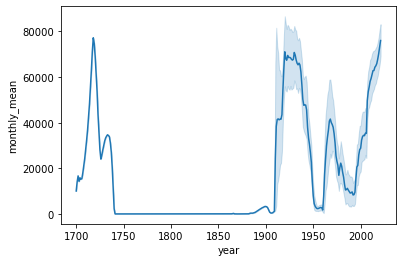

In [13]:
sns.lineplot(data = all_areas.loc[(all_areas['lon']==-104.5)
              &(all_areas['lat']==23.5)],
         x = 'year', y = 'monthly_mean'
        )

In [5]:
all_areas.loc[(all_areas['monthly_mean'] > 10000)&(all_areas['PFT_group']=='Tropical')]

NameError: name 'all_areas' is not defined

<Axes: xlabel='year', ylabel='monthly_mean'>

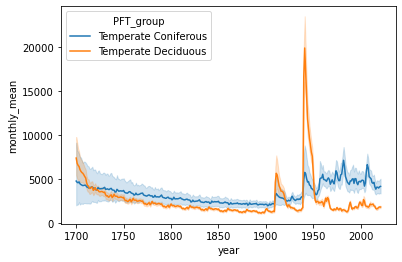

In [29]:
all_areas_old_params['monthly_mean_weight'] = all_areas_old_params['monthly_mean']* all_areas_old_params['cohort_area']
pft_yr_old = all_areas_old_params.groupby(
    ['lat','lon','year','variable','PFT_group']
)[all_areas_old_params.columns[all_areas_old_params.columns.str.contains('weight|area')]
].sum()
pft_yr_old=pft_yr_old.reset_index()
# ### finish weighted average calculation
pft_yr_old['monthly_mean'] = (pft_yr_old['monthly_mean_weight']/ pft_yr_old['cohort_area'])
sns.lineplot(data=pft_yr_old, x='year', y='monthly_mean', hue='PFT_group')

In [21]:
all_areas['monthly_mean_weight'] = all_areas['monthly_mean']* all_areas['cohort_area']
pft_yr = all_areas.groupby(
    ['year','variable','PFT_group']
)[all_areas.columns[all_areas.columns.str.contains('weight|area')]
].sum()
pft_yr=pft_yr.reset_index()
# ### finish weighted average calculation
pft_yr['monthly_mean'] = (pft_yr['monthly_mean_weight']/ pft_yr['cohort_area'])


<Axes: xlabel='year', ylabel='monthly_mean'>

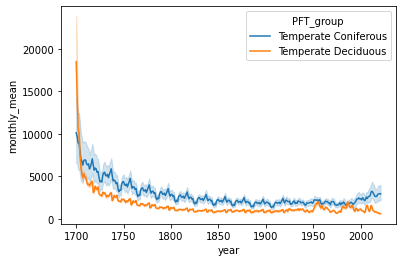

In [20]:
sns.lineplot(data=pft_yr, x='year', y='monthly_mean', hue='PFT_group')

<Axes: xlabel='year', ylabel='monthly_mean'>

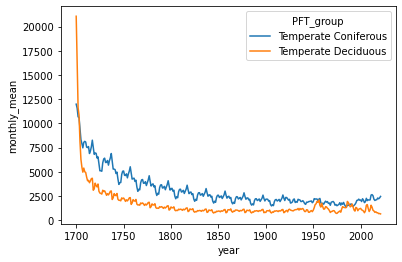

In [28]:
sns.lineplot(data=pft_yr, x='year', y='monthly_mean', hue='PFT_group')

In [ ]:
all_years = all_years.loc[~all_years['current_veg'].isin([6,19])] ###dropping woodlands
all_years = all_years.loc[all_years['monthly_mean'].between(-1e8,1e8)] ###dropping woodlands
all_years.loc[all_years['community_type'].isin([4,5]), 'PFT_group'] = 'Boreal'
all_years.loc[all_years['community_type'].isin([17,20,16,18]), 'PFT_group'] = 'Tropical'
all_years.loc[all_years['community_type'].isin([10,11,25]), 'PFT_group'] = 'Temperate Deciduous'
all_years.loc[all_years['community_type'].isin([9,8]), 'PFT_group'] = 'Temperate Coniferous'
all_years.loc[all_years['community_type'].isin([33]), 'PFT_group'] = 'Temperate Broadleaf'
all_years.loc[all_years['PFT_group'].isna()]

In [ ]:
####read in region


##quick compare boreal is the same

##check out tropical LAI, VEGC

In [3]:
dir_readin = '/group/moniergrp/TEM_Large_Ensemble/run_support_files/cru_regions/region_3/var_out/'
regions = pd.DataFrame({'files':os.listdir(dir_readin)})

read_in = np.array(regions.loc[regions['files'].str.contains('VEGC|LAI'), 'files'])
read_in

array(['VEGC.csv450', 'VEGC.csv200', 'LAI.csv100', 'VEGC.csv300',
       'LAI.csv50', 'LAI.csv450', 'VEGC.csv100', 'LAI.csv200',
       'LAI.csv300', 'VEGC.csv50', 'LAI.csv150', 'VEGC.csv250',
       'LAI.csv0', 'VEGC.csv400', 'VEGC.csv350', 'LAI.csv250',
       'VEGC.csv150', 'VEGC.csv0', 'LAI.csv400', 'LAI.csv350'],
      dtype=object)

In [4]:
##check out tropical LAI, VEGC

##subset out coniferous and deciduous AVAILN, plot timeseries

all_areas = pd.DataFrame()

for region in read_in:
    tt = pd.read_csv(dir_readin + region, names = output_col_names)
    tt = tt.loc[tt['community_type'].isin([17,20,16,18])]
    all_areas = pd.concat([all_areas, tt])
    


In [6]:
all_areas.loc[(all_areas['variable'] == ' LAI ')
              &(all_areas['monthly_mean'].between(1,2))
             &(all_areas['year']<1750)]

,lon,lat,variable,cohort_number,stand_age,potential_veg,current_veg,community_type,subtype,silt_clay,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,region
530190,-105.5,19.5,LAI,6,10,18,18,18,10,69.55,...,1.03,0.92,0.86,0.96,1.16,1.42,1.51,1.49,1.40,Mexico
530223,-105.5,19.5,LAI,6,11,18,18,18,10,69.55,...,1.06,0.97,0.90,0.98,1.20,1.54,1.62,1.53,1.43,Mexico
530225,-105.5,19.5,LAI,8,10,18,18,18,10,69.55,...,1.00,0.89,0.82,0.91,1.08,1.38,1.49,1.45,1.37,Mexico
530258,-105.5,19.5,LAI,6,12,18,18,18,10,69.55,...,1.07,0.98,0.90,1.04,1.33,1.65,1.66,1.59,1.50,Mexico
530260,-105.5,19.5,LAI,8,11,18,18,18,10,69.55,...,1.03,0.95,0.88,0.99,1.25,1.55,1.60,1.55,1.47,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645607,-91.0,19.5,LAI,98,17,18,18,18,10,73.44,...,1.23,1.13,1.30,1.44,1.65,1.64,1.65,1.54,1.42,Mexico
2645609,-91.0,19.5,LAI,100,16,18,18,18,10,73.44,...,1.25,1.14,1.30,1.44,1.65,1.66,1.66,1.56,1.43,Mexico
2645611,-91.0,19.5,LAI,102,15,18,18,18,10,73.44,...,1.29,1.18,1.33,1.46,1.67,1.70,1.72,1.62,1.49,Mexico
2645615,-91.0,19.5,LAI,106,14,18,18,18,10,73.44,...,1.34,1.23,1.37,1.50,1.71,1.76,1.78,1.67,1.54,Mexico


In [35]:
all_areas.loc[(all_areas['variable'] == ' LAI ')
              &(all_areas['monthly_mean'].between(1,2))
             &(all_areas['year']<1750)]

,lon,lat,variable,cohort_number,stand_age,potential_veg,current_veg,community_type,subtype,silt_clay,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,region
530190,-105.5,19.5,LAI,6,10,18,18,18,10,69.55,...,1.05,0.93,0.86,0.97,1.16,1.43,1.52,1.51,1.42,Mexico
530223,-105.5,19.5,LAI,6,11,18,18,18,10,69.55,...,1.07,0.98,0.90,0.99,1.21,1.55,1.63,1.54,1.44,Mexico
530225,-105.5,19.5,LAI,8,10,18,18,18,10,69.55,...,1.01,0.89,0.81,0.90,1.08,1.38,1.49,1.46,1.38,Mexico
530258,-105.5,19.5,LAI,6,12,18,18,18,10,69.55,...,1.07,0.99,0.91,1.04,1.34,1.66,1.67,1.60,1.50,Mexico
530260,-105.5,19.5,LAI,8,11,18,18,18,10,69.55,...,1.04,0.96,0.88,0.99,1.25,1.56,1.61,1.56,1.48,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645607,-91.0,19.5,LAI,98,17,18,18,18,10,73.44,...,1.26,1.16,1.31,1.45,1.66,1.67,1.68,1.58,1.45,Mexico
2645609,-91.0,19.5,LAI,100,16,18,18,18,10,73.44,...,1.27,1.17,1.32,1.45,1.66,1.68,1.70,1.59,1.46,Mexico
2645611,-91.0,19.5,LAI,102,15,18,18,18,10,73.44,...,1.32,1.22,1.35,1.49,1.69,1.75,1.76,1.66,1.52,Mexico
2645615,-91.0,19.5,LAI,106,14,18,18,18,10,73.44,...,1.39,1.28,1.43,1.57,1.78,1.84,1.85,1.73,1.59,Mexico


In [5]:
data = all_areas.loc[
        (all_areas['lon'] == -105.5) &
        (all_areas['lat'] == 19.5) &
        (all_areas['variable'] == ' LAI ')
    ]

data['monthly_mean_weight'] = data['monthly_mean']* data['cohort_area']
data = data.groupby(
    ['lon','lat','year','variable']
)[data.columns[data.columns.str.contains('weight|area')]
].sum()
data['monthly_mean'] = (data['monthly_mean_weight']/ data['cohort_area'])


/tmp/ipykernel_2060246/2617526555.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['monthly_mean_weight'] = data['monthly_mean']* data['cohort_area']


In [7]:
data=data.reset_index()

<Axes: xlabel='year', ylabel='monthly_mean'>

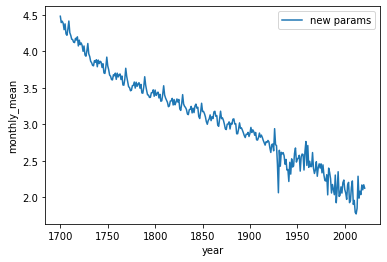

In [8]:
sns.lineplot(
    data=data,
    x='year', y='monthly_mean',
    label='new params'
)


<Axes: xlabel='year', ylabel='monthly_mean'>

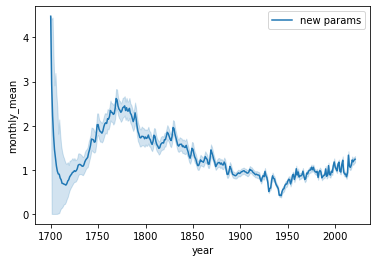

In [7]:
# Plot using 'new params' data
sns.lineplot(
    data=all_areas.loc[
        (all_areas['lon'] == -105.5) &
        (all_areas['lat'] == 19.5) &
        (all_areas['variable'] == ' LAI ')
    ],
    x='year', y='monthly_mean',
    label='new params'
)


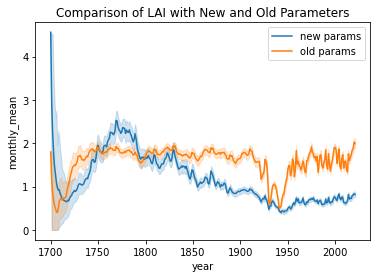

In [41]:
# Plot using 'new params' data
sns.lineplot(
    data=all_areas.loc[
        (all_areas['lon'] == -105.5) &
        (all_areas['lat'] == 19.5) &
        (all_areas['variable'] == ' LAI ')
    ],
    x='year', y='monthly_mean',
    label='new params'
)

# Plot using 'old params' data
sns.lineplot(
    data=all_areas_old_param.loc[
        (all_areas_old_param['lon'] == -105.5) &
        (all_areas_old_param['lat'] == 19.5) &
        (all_areas_old_param['variable'] == ' LAI ')
    ],
    x='year', y='monthly_mean',
    label='old params'
)

# Display the legend
plt.legend()

# Optionally, you can give the plot a title
plt.title("Comparison of LAI with New and Old Parameters")

# Show the combined plot
plt.show()

<Axes: xlabel='year', ylabel='monthly_mean'>

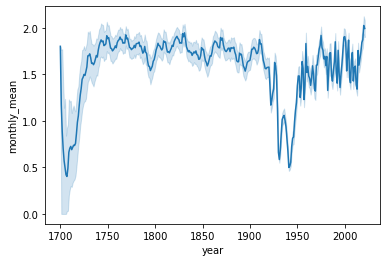

In [38]:
sns.lineplot(data = all_areas_old_param.loc[(all_areas_old_param['lon']==-105.5)
              &(all_areas_old_param['lat']==19.5)
                                 &(all_areas_old_param['variable']==' LAI ')],
         x = 'year', y = 'monthly_mean'
        )

<Axes: xlabel='year', ylabel='monthly_mean'>

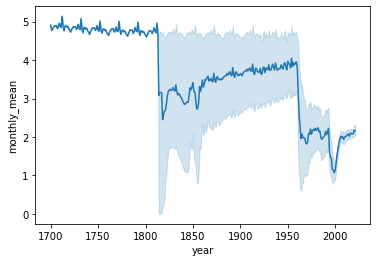

In [9]:
sns.lineplot(data = all_areas.loc[(all_areas['lon']==-93.0)
              &(all_areas['lat']==18.5)
                                 &(all_areas['variable']==' LAI ')],
         x = 'year', y = 'monthly_mean'#, color = 'new params'
        )

<Axes: xlabel='year', ylabel='monthly_mean'>

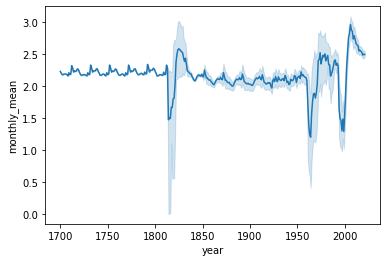

In [30]:
sns.lineplot(data = all_areas_old_param.loc[(all_areas_old_param['lon']==-93.0)
              &(all_areas_old_param['lat']==18.5)
                                 &(all_areas_old_param['variable']==' LAI ')],
         x = 'year', y = 'monthly_mean'
        )

<Axes: xlabel='year', ylabel='monthly_mean'>

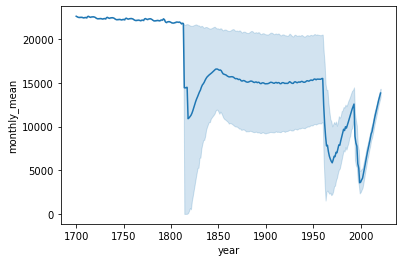

In [26]:
sns.lineplot(data = all_areas.loc[(all_areas['lon']==-93.0)
              &(all_areas['lat']==18.5)
                                 &(all_areas['variable']==' VEGC ')],
         x = 'year', y = 'monthly_mean'
        )

In [7]:
read_in = np.array(regions.loc[regions['files'].str.contains('LAI'), 'files'])
read_in

all_areas = pd.DataFrame()

for region in read_in:
    tt = pd.read_csv(dir_readin + region, names = output_col_names)
    tt = tt.loc[tt['community_type'].isin([17,20,16,18])]
    all_areas = pd.concat([all_areas, tt])
    

    

In [19]:
all_areas.loc[all_areas['variable'] == ' LAI ','monthly_mean'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: monthly_mean, dtype: float64

In [10]:
all_areas.loc[all_areas['variable'] == ' LAI ','monthly_mean'].describe()

count    1.543079e+06
mean     1.132848e+00
std      1.160272e+00
min      0.000000e+00
25%      2.000000e-02
50%      9.800000e-01
75%      1.580000e+00
max      5.570000e+00
Name: monthly_mean, dtype: float64

In [34]:
all_areas.loc[all_areas['variable'] == ' LAI ','monthly_mean'].describe()

count    1.446738e+06
mean     1.066685e+00
std      1.136987e+00
min      0.000000e+00
25%      3.000000e-02
50%      8.000000e-01
75%      1.440000e+00
max      5.580000e+00
Name: monthly_mean, dtype: float64

In [27]:
all_areas_old_param = pd.DataFrame()

for region in read_in:
    tt = pd.read_csv('/group/moniergrp/TEM_Large_Ensemble/run_support_files/cru_regions/region_3/var_out_old_params/' + region, names = output_col_names)
    tt = tt.loc[tt['community_type'].isin([17,20,16,18])]
    all_areas_old_param = pd.concat([all_areas_old_param, tt])
    


In [ ]:
all_areas_old_param.loc[all_areas_old_param['variable'] == ' LAI ','monthly_mean'].describe()

count    1.543079e+06
mean     1.448973e+00
std      1.095384e+00
min      0.000000e+00
25%      4.000000e-02
50%      1.770000e+00
75%      2.400000e+00
max      3.850000e+00
Name: monthly_mean, dtype: float64

In [33]:
all_areas_old_param.loc[(all_areas_old_param['variable'] == ' LAI ')
                        &(all_areas_old_param['year'] < 1750)
                        ,'monthly_mean'].describe()


count    42828.000000
mean         1.098002
std          1.050835
min          0.000000
25%          0.000000
50%          0.900000
75%          2.180000
max          2.980000
Name: monthly_mean, dtype: float64

In [40]:
all_areas.loc[(all_areas['variable'] == ' LAI ')
                        &(all_areas['year'] == 1701)
                        ,'monthly_mean'].describe()


count    136.000000
mean       3.755588
std        1.547301
min        0.000000
25%        3.850000
50%        4.465000
75%        4.612500
max        4.860000
Name: monthly_mean, dtype: float64

In [12]:
all_areas.columns

Index(['lon', 'lat', 'variable', 'cohort_number', 'stand_age', 'potential_veg',
       'current_veg', 'community_type', 'subtype', 'silt_clay', 'lc_state',
       'land_area', 'cohort_area', 'year', 'annual_sum', 'monthly_maximum',
       'monthly_mean', 'monthly_minimum', 'Jan', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'region'],
      dtype='object')

In [13]:
all_areas.loc[(all_areas['variable'] == ' LAI ')
                        &(all_areas['cohort_number'] == 1)
                        ,'monthly_mean'].describe()


count    19642.000000
mean         3.992352
std          1.186442
min          0.000000
25%          4.110000
50%          4.380000
75%          4.570000
max          5.570000
Name: monthly_mean, dtype: float64

In [11]:
all_areas.loc[(all_areas['variable'] == ' LAI ')
                        &(all_areas['year'] == 1701)
                        ,'monthly_mean'].describe()


count    136.000000
mean       3.656397
std        1.509354
min        0.000000
25%        3.810000
50%        4.340000
75%        4.490000
max        4.780000
Name: monthly_mean, dtype: float64

In [32]:
all_areas.loc[all_areas['variable'] == ' LAI ','monthly_mean'].describe()

count    1.543079e+06
mean     1.004290e+00
std      1.128576e+00
min      0.000000e+00
25%      1.000000e-02
50%      7.500000e-01
75%      1.400000e+00
max      5.580000e+00
Name: monthly_mean, dtype: float64

In [41]:
all_areas.loc[all_areas['variable'] == ' VEGC ','monthly_mean'].describe()

count    1.503860e+06
mean     3.870334e+03
std      4.674532e+03
min      0.000000e+00
25%      8.660000e+00
50%      2.230230e+03
75%      5.779375e+03
max      2.298650e+04
Name: monthly_mean, dtype: float64

In [42]:
all_areas_old_param.loc[all_areas_old_param['variable'] == ' VEGC ','monthly_mean'].describe()



count    1.543079e+06
mean     5.684523e+03
std      5.572928e+03
min      0.000000e+00
25%      4.489000e+01
50%      4.267740e+03
75%      9.885395e+03
max      2.728655e+04
Name: monthly_mean, dtype: float64